#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/SHAI/Salaries.csv')
df.head()


Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisco     NaN  
1  2011    NaN  San Francisco     NaN  
2  2011    NaN  San Francisco     NaN  
3  2011    NaN  San Francisco     NaN  
4  2011    NaN  San Francisco     NaN

# Basic Data Exploraion

In [3]:
# 1. Number of rows in dataframe
num_rows = df.shape[0]
print("Number of rows:", num_rows)



Number of rows: 148654


In [4]:
# 2. Number of columns
num_columns = df.shape[1]
print("Number of columns:", num_columns)



Number of columns: 13


In [5]:
# 3. Datatypes of columns
data_types = df.dtypes
print("Datatypes of columns:")
print(data_types)



Datatypes of columns:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
# 4. Missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# Descriptive Statisitcs

In [7]:
specific_column = 'TotalPay'


In [8]:
print(df[specific_column].describe())


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64


In [9]:
minimum = df[specific_column].min()
maximum = df[specific_column].max()
mode = df[specific_column].mode()
range = maximum - minimum
print(f"Mode: {mode}")
print(f"Range: {range}")



Mode: 0    0.0
Name: TotalPay, dtype: float64
Range: 568213.56


# Data cleaning

In [12]:
# Drop Notes and status columns as they are totally missing values
df = df.drop(['Notes', 'Status'],axis=1)


In [13]:
print(df.columns)

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')


In [14]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64


In [16]:
# Fill missing values with mean to reduce bias and offset
df = df.fillna({'BasePay': df['BasePay'].mean(), 'Benefits': df['Benefits'].mean()})



In [17]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         4
OtherPay            4
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [18]:
# Fill missing values with mean for reducing bias and offset
df = df.fillna({'OvertimePay': df['OvertimePay'].mean(), 'OtherPay': df['OtherPay'].mean()})

In [19]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# Data Visualization

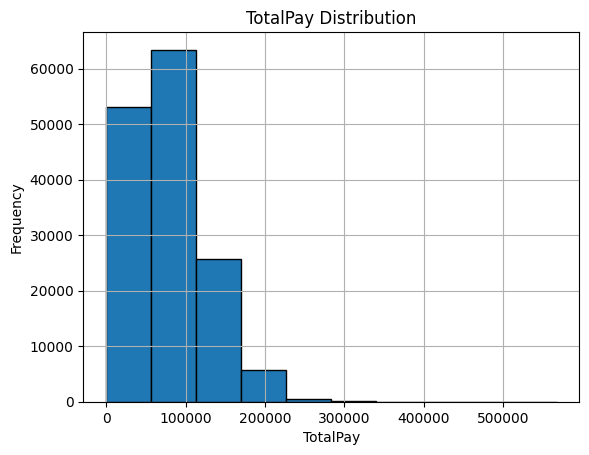

In [22]:
# (1) Histogram of salaries
import matplotlib.pyplot as plt
# Create a histogram for the 'TotalPay' column
df['TotalPay'].plot.hist(edgecolor='black')

# Customize the plot (optional)
plt.xlabel('TotalPay')
plt.ylabel('Frequency')
plt.title('TotalPay Distribution')
plt.grid(True)

# Show the plot
plt.show()

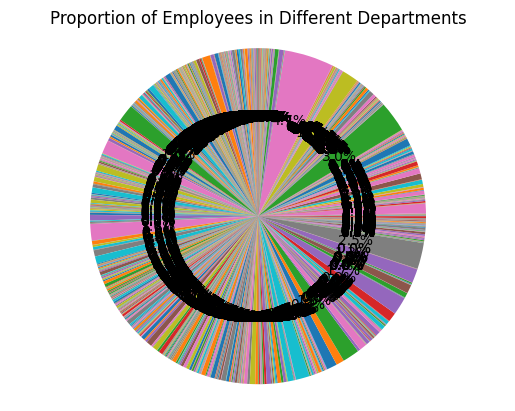

In [27]:
# (2) Pie chart
# Group the data by department.
department_counts = df.groupby("JobTitle").size()
# Create a pie chart.
plt.pie(department_counts, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Employees in Different Departments")
plt.axis("equal")
plt.show()

# Grouped Analysis

In [29]:
# Group by 'Department'
grouped_by_department = df.groupby('JobTitle')

# Calculate summary statistics (mean, std, min, max, range)
summary_stats_department = grouped_by_department['TotalPay'].describe()

# Print the results
print("\nSummary statistics grouped by department:")
print(summary_stats_department)

# Group by otherPay'
grouped_by_OtherPay = df.groupby('OtherPay')

# Calculate summary statistics (mean, std, min, max, range)
summary_stats_OtherPay = grouped_by_OtherPay['TotalPay'].describe()
# Print the results
print("\nSummary statistics grouped by OtherPay:")
print(summary_stats_OtherPay)



Summary statistics grouped by department:
                                                count          mean  \
JobTitle                                                              
ACCOUNT CLERK                                    83.0  44035.664337   
ACCOUNTANT                                        5.0  47429.268000   
ACCOUNTANT INTERN                                48.0  29031.742917   
ACPO,JuvP, Juv Prob (SFERS)                       1.0  62290.780000   
ACUPUNCTURIST                                     1.0  67594.400000   
...                                               ...           ...   
X-RAY LABORATORY AIDE                            26.0  52705.880385   
X-Ray Laboratory Aide                           100.0  50823.942700   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    1.0  53632.870000   
Youth Comm Advisor                                4.0  41414.307500   
ZOO CURATOR                                       1.0  66686.560000   

                                 

## The second group by is more reosnable than the first

# Correlation Analysis

In [30]:
# Choose the columns for correlation and plot
column1 = 'TotalPay'
column2 = 'OtherPay'

# Calculate correlation coefficient
correlation = df[column1].corr(df[column2])

# Print the correlation coefficient
print(f"Correlation between '{column1}' and '{column2}': {correlation:.2f}")

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[column1], df[column2])

# Add labels and title
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f"Scatter Plot of {column1} vs. {column2}")

# Optional: Add trendline (linear regression)
m, b = np.polyfit(df[column1], df[column2], 1)
plt.plot(df[column1], m * df[column1] + b, color='red')

# Show the plot
plt.grid(True)
plt.show()

Correlation between 'TotalPay' and 'OtherPay': 0.47


# Good Luck!